# Repeat analysis on US murder rate data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
import pandas as pd
import statsmodels.api as sm
from scipy import stats

# import custom functions in myFunctions.ipynb
import ipynb.fs.defs.myFunctions as myFun

In [4]:
usCrime = pd.read_excel("Data/US_crime.xlsx")

## Plot descriptive scaling

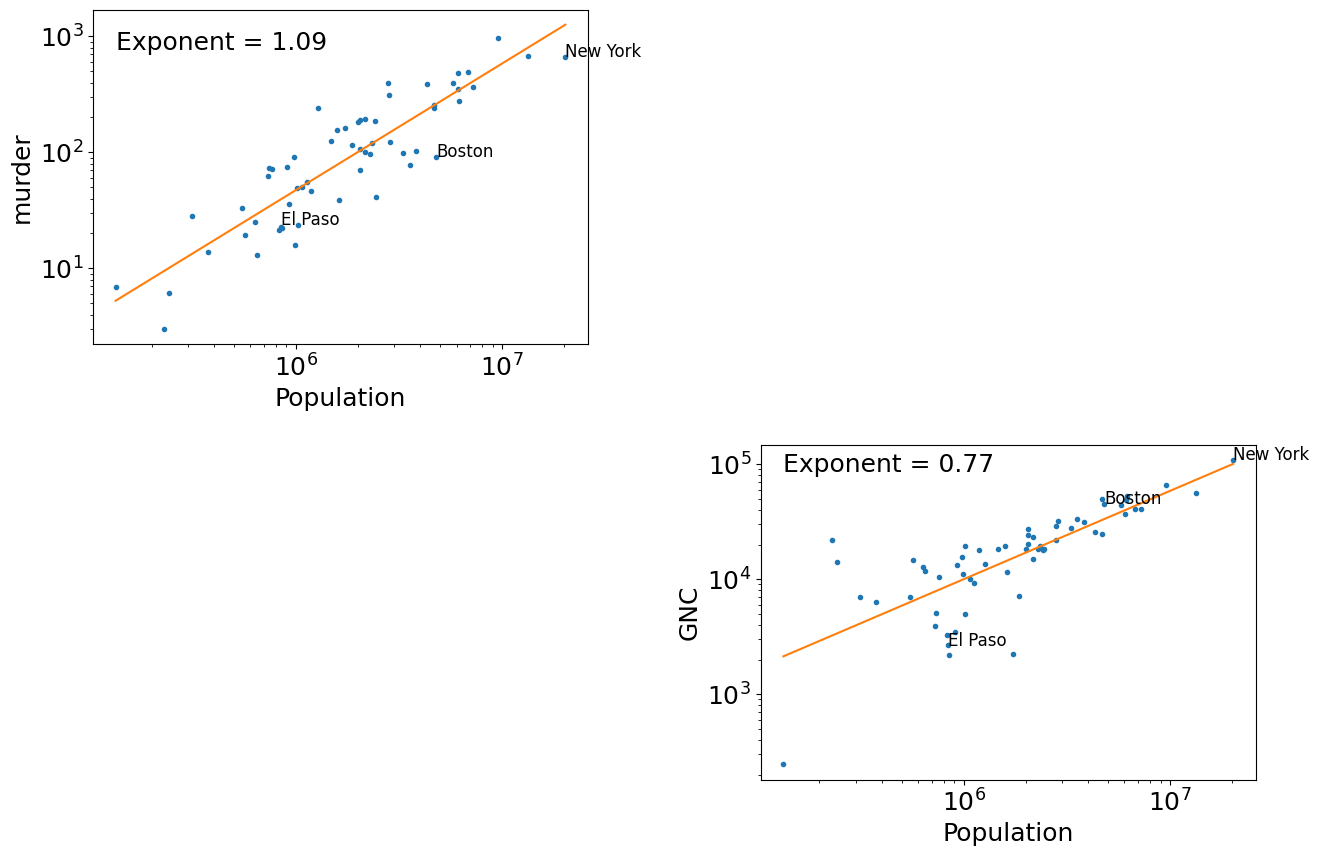

In [6]:
plt.figure(figsize = (15, 10))
total_col  = 2
    
annotate = ["New York", "Boston", "El Paso", "San Jose (Ca)"]

myFun.descriptive_scaling(usCrime, total_col, 1, "population", "murder" , "gncAbs", annotate, 
                         ylable1 = 'murder')

plt.subplots_adjust(wspace = 0.35, hspace = 0.3)



## Residual plots in 3 panels

In [7]:
def compute_log_residual(df, xvar, yvar, beta, c): 
    """
    Compute the log residual. Compute the logs of variables first
    beta, c = regression best fit of the log-transformed variables.  
    """
    logx = np.log(df[xvar])
    logy = np.log(df[yvar])
    logy_pred = logx*beta + c
    logy_residual = logy - logy_pred
    return logy_residual

def process_1_country(df, xvar, yvar, residualVarName = "logGdpResidual"):
    """
    Compute log residuals for one country
    """
    beta, c = myFun.fit_scaling(df[xvar], df[yvar], plot = 0)
    df[residualVarName] = compute_log_residual(df, xvar, yvar, beta, c)
    return df

In [8]:
# compute crime residuals for three countries
df = process_1_country(usCrime, "population", "murder", "logCrimeResidual")
    
# compute the gnc rediduals for 3 countries.
df = process_1_country(usCrime, "population", "gncAbs", "logGncResidual")

## Plot the correlations between residuals

best fit equations: y = -0.18 x + -0.00


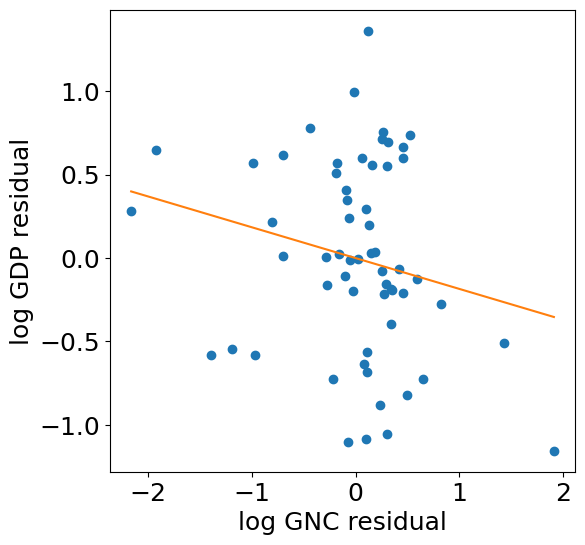

In [9]:
def plot_residuals(df, xResVar, yResVar, gncVar, annotateList):
    m, b = myFun.plotLinear(df,xResVar , yResVar, gncVar , annotateList, delta = 0.01, plotLine = 1, dotmarker = "o")
    plt.xlabel("log GNC residual")
    plt.ylabel("log GDP residual")





plt.figure(figsize = (6, 6))
plot_residuals(usCrime, "logGncResidual", "logCrimeResidual", "city_gnc", [])


plt.subplots_adjust(wspace = 0.4, hspace = 0.2)


In [11]:
#correlation 
stats.pearsonr(usCrime.logGncResidual, usCrime.logCrimeResidual)

PearsonRResult(statistic=-0.20894270699383616, pvalue=0.11224901275939958)

## Repeat the regression

In [12]:
out1 = myFun.run_null_model(usCrime, "population", "murder")


In [13]:
out1

{'params': const        -11.239056
 population     1.092623
 dtype: float64,
 'aic': 107.46923976560902,
 'bic': 111.62431465342046,
 'CI95':                     0         1
 const      -13.430219 -9.047894
 population   0.940438  1.244809,
 'r_sq': 0.7838390964736471,
 'r_sq_adj': 0.7800467999205531,
 'standar_err': const         1.094233
 population    0.075999
 dtype: float64}

In [14]:
out2 = myFun.run_gnc_model(usCrime, "population", "gncAbs", "murder")



In [15]:
out2

{'params': const        -11.498003
 population     1.234691
 gncAbs        -0.184999
 dtype: float64,
 'aic': 106.83555640801424,
 'bic': 113.0681687397314,
 'CI95':                     0         1
 const      -13.684886 -9.311119
 population   1.001784  1.467597
 gncAbs      -0.416786  0.046788,
 'r_sq': 0.7932760448857926,
 'r_sq_adj': 0.7858930464888566,
 'standar_err': const         1.091673
 population    0.116265
 gncAbs        0.115706
 dtype: float64}